# Evaluation

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
x, y = data.drop("Outcome", axis=1), np.ravel(data['Outcome'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)
print("train size:",len(x_train),"\ntest size:",len(x_test))

train size: 537 
test size: 231


In [30]:
from sklearn.preprocessing import StandardScaler

# normalize data
scaler = StandardScaler().fit(x_train)
x, x_train, x_test = scaler.transform(x), scaler.transform(x_train), scaler.transform(x_test)

NameError: name 'sklearn' is not defined

In [5]:
from sklearn.naive_bayes import GaussianNB

predictor = GaussianNB()
predictor.fit(x_train, y_train)
y_pred = predictor.predict(x_test)
print("Reference:\n",y_test,"\nPrediction:\n",y_pred)
y_pred_prob = predictor.predict_proba(x_test)[:,1]
print("Probability of class 0 for first 10 observations:\n",y_pred_prob[0:10])

Reference:
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0] 
Prediction:
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 1 0 0]
Probability of class 0 for first 1

### 1) Confusion-based scores

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Diabetic', 'Healthy'], columns=['Predicted Diabetes', 'Predicted Healthy'])
confusion

,Predicted Diabetes,Predicted Healthy
Diabetic,123,25
Healthy,38,45


<AxesSubplot:>

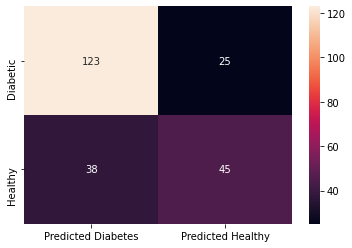

In [7]:
sns.heatmap(confusion, annot=True, fmt='g')

Accuray, recall, precision, specificity, F1, AUC

In [8]:
from sklearn import metrics
print("accuracy:",  round(metrics.accuracy_score(y_test, y_pred),2))
print("recall/sensitivity:", round(metrics.recall_score(y_test, y_pred),2))
print("precision:", round(metrics.precision_score(y_test, y_pred),2))

accuracy: 0.73
recall/sensitivity: 0.54
precision: 0.64


In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("specificity:", round(tn/(tn+fp),2))

specificity: 0.83


In [10]:
print("F1 score:", round(metrics.f1_score(y_test, y_pred),2))

F1 score: 0.59


In [11]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)
print("AUC:", round(auc,2))

AUC: 0.8


In [12]:
print("synthesis:",metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))

synthesis:               precision    recall  f1-score   support

           0       0.76      0.83      0.80       148
           1       0.64      0.54      0.59        83

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



Using **cross-validation**

In [13]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(predictor, x, y, cv=10, scoring='accuracy')
auc = cross_val_score(predictor, x, y, cv=10, scoring='roc_auc')

print("accuracy:",round(np.mean(acc),2),"±",round(np.std(acc),2))
print("AUC:",round(np.mean(auc),2),"±",round(np.std(auc),2))

accuracy: 0.76 ± 0.03
AUC: 0.82 ± 0.05


In [14]:
recall = cross_val_score(predictor, x, y, cv=10, scoring='recall')
precision = cross_val_score(predictor, x, y, cv=10, scoring='precision')
f1 = cross_val_score(predictor, x, y, cv=10, scoring='f1')

print("recall:",round(np.mean(recall),2),"±",round(np.std(recall),2))
print("accuracy:",round(np.mean(precision),2),"±",round(np.std(precision),2))
print("f1:",round(np.mean(f1),2),"±",round(np.std(f1),2))

recall: 0.59 ± 0.07
accuracy: 0.67 ± 0.06
f1: 0.63 ± 0.05


### 2) Statistically testing differences

In [26]:
from scipy import stats

# generate performance estimates for two predictors (simulate folds)
pred_1 = stats.norm.rvs(loc=10, scale=5, size=10)
pred_2 = pred_1 + stats.norm.rvs(loc=1, scale=2, size=10)
print("Predictor 1 scores:",pred_1,"\nPredictor 2 scores:",pred_2)

Predictor 1 scores: [16.19055553 12.08020352  7.13840323  7.99030284  6.56359741 11.88887213
  8.85181473  4.70786836  9.23116732  6.59677576] 
Predictor 2 scores: [18.38898936 14.90395596  5.80059183  9.61039775  6.77590322 10.46230431
 10.72640394  9.09735115 11.98174401  9.76668423]


Assuming estimates follow a Gaussian assumption, we can test differences using t-Test

In [27]:
# predictor 1 is better than 2?
res = stats.ttest_rel(pred_1, pred_2, alternative='greater')
print("p1>p2? pval=",res.pvalue)

# predictor 2 is better than 1?
res = stats.ttest_rel(pred_1, pred_2, alternative='less')
print("p1<p2? pval=",res.pvalue)

# performance of predictor 1 differs from predictor 2?
res = stats.ttest_rel(pred_1, pred_2, alternative='two-sided')
print("p1!=p2? pval=",res.pvalue)

p1>p2? pval= 0.9873798591599994
p1<p2? pval= 0.012620140840000564
p1!=p2? pval= 0.025240281680001128


In [28]:
# predictions not collected from the same folds (to avoid at all costs)
res = stats.ttest_ind(pred_1, pred_2, alternative='less')
print("p1>p2? pval=",res.pvalue)

p1>p2? pval= 0.15930506169190656


*Conclusion*: in a paired setting (estimates collected for the same folds), we observe that performance of predictor 2 is better than predictor 1 with statistical significance under a confidence threshold of 0.05 since 0.0126<0.05

### 3) ROC curves

Traditional ROC curve

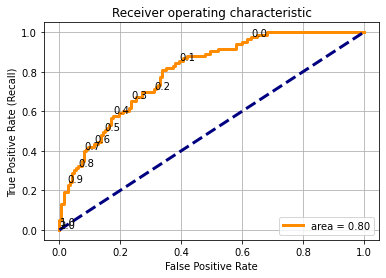

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

# plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
ax.legend(loc="lower right")
ax.grid(True)

# annotate ROC thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax.annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)

Alternative **Precision-Recall curve**

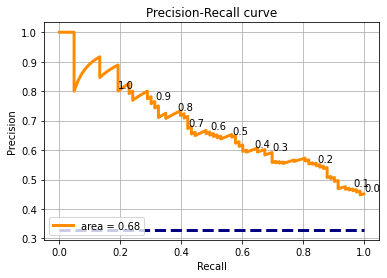

In [19]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(recalls, precisions)

# plot PR curve
fig, ax = plt.subplots()
ax.plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax.plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax.set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax.legend(loc="lower left")
ax.grid(True)

# annotate PR thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax.annotate(np.round(t,1), xy=(recalls[i],precisions[i]),xytext=(recalls[i],precisions[i]),textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
plt.show()

Assess performance at different thresholds

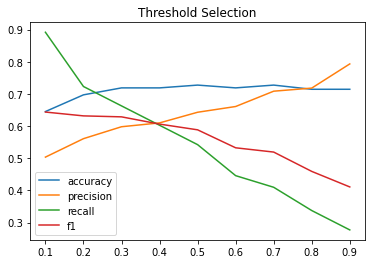

In [20]:
# acquire results
thresholds = []
dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (y_pred_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(y_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(y_test, predicted))
    dic_scores["recall"].append(metrics.recall_score(y_test, predicted))
    dic_scores["f1"].append(metrics.f1_score(y_test, predicted))

# plot results
fig, ax = plt.subplots()
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))    
dtf_scores.plot(ax=ax, title="Threshold Selection")
plt.show()

ROC curve per fold *versus* **mean ROC curve**

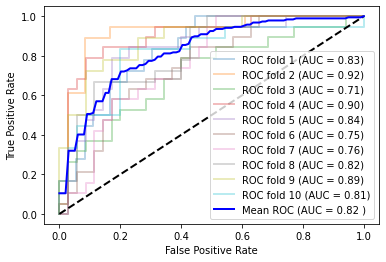

In [21]:
from sklearn import model_selection

tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1

for train, test in cv.split(x_train, y_train):
    prediction = predictor.fit(x_train[train],y_train[train]).predict_proba(x_train[test])
    fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()